# EPA

In [2]:
# importing packages

import pandas as pd
import numpy as np
import os
import glob
import re
import chardet
import string
string.punctuation
from spacy import displacy
from spacy.matcher import Matcher
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer #detokenize
os.chdir("C:/Users/Indrani B/Desktop/bootcamp/job°recommender/NEW_TEST")
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

#!pip3 install spacy
import spacy 
#print(spacy.__version__) 
#gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#!pip install python-Levenshtein


#warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
from tqdm import tqdm
import ast

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sb


import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()



C:\Users\Indrani B\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Loading BokehJS ...

# joining CSV`s

In [3]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
#export to combined csv
combined_csv.to_csv("training.csv", index=False, encoding='utf-8-sig')

In [5]:
df = pd.read_csv('training.csv', encoding='utf-8')   ##compiled data
df1 = pd.read_csv('linkedin-canada-incremental-2020-12-03.csv',  encoding='utf-8') ##sample data
df.head(-2)
df2 = df[0:10000]
df2

,Unnamed: 0,Title,Company,Location,Summary,Description,Date,Duration,Link
0,0.0,"Student Intern, Data Analyst & Quote Controller",Celestica,"Toronto, Ontario","['Seniority level', 'Internship', 'Employment ...","['Req ID: 65591', 'Region: Americas', 'Country...",2020-11-06,2 weeks ago,https://ca.linkedin.com/jobs/view/student-inte...
1,1.0,Intermediate Data Analyst,QSI,"Ottawa, Ontario","['Seniority level', 'Entry level', 'Employment...",['Category: IT Services Location:Assist in ide...,2020-11-06,4 weeks ago,https://ca.linkedin.com/jobs/view/intermediate...
2,2.0,Senior Technical Data Analyst,BMO Financial Group,"Toronto, Ontario","['Seniority level', 'Not Applicable', 'Employm...","['Address', '', '120 Bloor Street East', '', '...",2020-11-06,4 hours ago,https://ca.linkedin.com/jobs/view/senior-techn...
3,3.0,Data Analyst 3 (contract),Tundra Technical Solutions,"Montreal, Quebec","['Seniority level', 'Associate', 'Employment t...","['Job Description', '', 'Provide data analysis...",2020-11-06,1 week ago,https://ca.linkedin.com/jobs/view/data-analyst...
4,4.0,Senior Data Analyst,Procom,"Mississauga, Ontario","['Seniority level', 'Associate', 'Employment t...","['Senior Data Analyst', '', 'On behalf of our ...",2020-11-06,1 day ago,https://ca.linkedin.com/jobs/view/senior-data-...
...,...,...,...,...,...,...,...,...,...
9995,4641.0,"Data Analyst, Marketing Operations",Imperva,"Austin, Texas, United States","['Seniority level', 'Associate', 'Employment t...","['Data Analyst, Marketing Operations', '', 'Th...",2020-10-31,3 weeks ago,https://www.linkedin.com/jobs/view/data-analys...
9996,4642.0,Data Analyst Manager,Two Sigma,"Houston, Texas, United States","['Seniority level', 'Not Applicable', 'Employm...","['Two Sigma is a financial sciences company, c...",2020-10-31,4 weeks ago,https://www.linkedin.com/jobs/view/data-analys...
9997,4643.0,Data Analyst (contract to hire),"Quanta Services, Inc.","Houston, Texas, United States","['Seniority level', 'Entry level', 'Employment...",['The Data Analyst will participate in all asp...,2020-10-31,4 weeks ago,https://www.linkedin.com/jobs/view/data-analys...
9998,4644.0,Epidemiology Data Analyst,General Dynamics Information Technology,"San Antonio, Texas, United States","['Seniority level', 'Entry level', 'Employment...","['Job Description', '', 'GDIT is seeking an Ep...",2020-10-31,1 month ago,https://www.linkedin.com/jobs/view/epidemiolog...


# remove numbers

In [6]:
df2['Description'] = df2['Description'].str.replace('\d+','')
df2['Description'].dropna()

<ipython-input-6-d3971fbc8948>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Description'] = df2['Description'].str.replace('\d+','')
<ipython-input-6-d3971fbc8948>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Description'] = df2['Description'].str.replace('\d+','')


0       ['Req ID: ', 'Region: Americas', 'Country: Can...
1       ['Category: IT Services Location:Assist in ide...
2       ['Address', '', ' Bloor Street East', '', 'Job...
3       ['Job Description', '', 'Provide data analysis...
4       ['Senior Data Analyst', '', 'On behalf of our ...
                              ...                        
9995    ['Data Analyst, Marketing Operations', '', 'Th...
9996    ['Two Sigma is a financial sciences company, c...
9997    ['The Data Analyst will participate in all asp...
9998    ['Job Description', '', 'GDIT is seeking an Ep...
9999    ['Position Purpose', 'Responsible for analytic...
Name: Description, Length: 10000, dtype: object

# remove punctuations


In [7]:
#remove punctuation
def remove_pun(txt):
    txt_nopun = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopun

In [8]:
df2['remove_Pun'] = df2['Description'].apply(lambda x:remove_pun(x))
df2['remove_Pun'].dropna()


<ipython-input-8-9a2e1ff69601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['remove_Pun'] = df2['Description'].apply(lambda x:remove_pun(x))


0       Req ID  Region Americas Country Canada StatePr...
1       Category IT Services LocationAssist in identif...
2       Address   Bloor Street East  Job Family Group ...
3       Job Description  Provide data analysis and sta...
4       Senior Data Analyst  On behalf of our client i...
                              ...                        
9995    Data Analyst Marketing Operations  The Opportu...
9996    Two Sigma is a financial sciences company comb...
9997    The Data Analyst will participate in all aspec...
9998    Job Description  GDIT is seeking an Epidemiolo...
9999    Position Purpose Responsible for analytic data...
Name: remove_Pun, Length: 10000, dtype: object

In [9]:
#text_remove_pun = df1['remove_Pun']
#text_remove_pun = ', '.join(df1['remove_Pun'])
#text_remove_pun
#ab = df['remove_Pun'][0:10]
df2['remove_Pun']
reindexed_data = df2['remove_Pun']

In [10]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):

    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [11]:
get_top_n_words

<function __main__.get_top_n_words(n_top_words, count_vectorizer, text_data)>

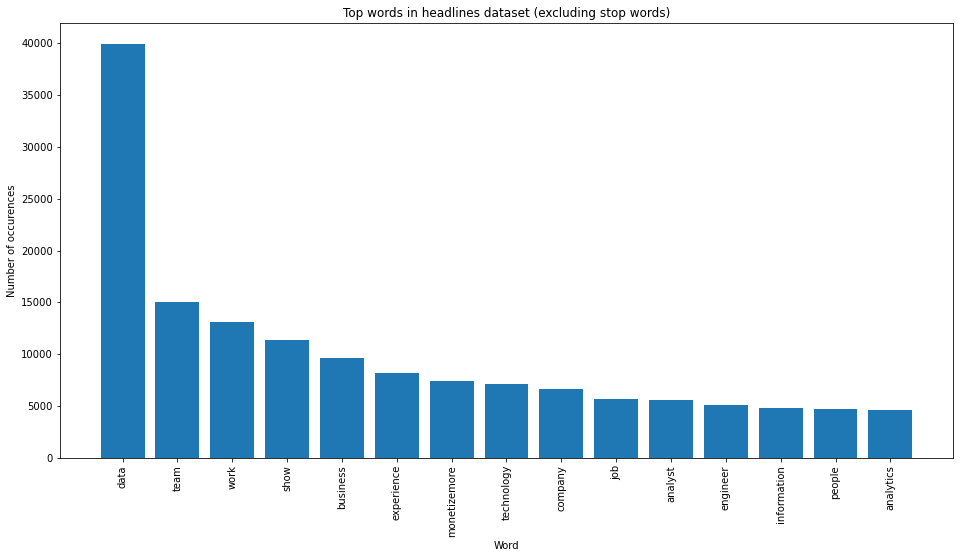

In [12]:
stopwords = nltk.corpus.stopwords.words('english') + nltk.corpus.stopwords.words('french')
count_vectorizer = CountVectorizer(stop_words=stopwords)
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

# count vectorization 

In [ ]:
##count vectorization 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

x = cv.fit_transform(text)
print (x.shape)
print(cv.get_feature_names())  

# preprocessing

In [15]:
small_count_vectorizer = CountVectorizer(stop_words=stopwords, max_features=40000)
small_text_sample = reindexed_data.sample(n=10000, random_state=0).values


small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('After vectorization: \n{}'.format(small_document_term_matrix[123]))

After vectorization: 
  (0, 5572)	14
  (0, 8217)	2
  (0, 19414)	1
  (0, 13684)	1
  (0, 20778)	1
  (0, 16769)	1
  (0, 19902)	1
  (0, 25508)	1
  (0, 22493)	1
  (0, 1949)	1
  (0, 11251)	1
  (0, 17969)	2
  (0, 19895)	1
  (0, 21601)	1
  (0, 16324)	1
  (0, 25148)	3
  (0, 6231)	2
  (0, 17302)	1
  (0, 123)	1
  (0, 4147)	3
  (0, 18349)	2
  (0, 5139)	1
  (0, 18747)	1
  (0, 19770)	2
  (0, 19178)	1
  :	:
  (0, 20909)	1
  (0, 20109)	1
  (0, 20693)	2
  (0, 25134)	1
  (0, 5187)	1
  (0, 20210)	1
  (0, 8794)	2
  (0, 4269)	1
  (0, 337)	1
  (0, 19192)	1
  (0, 17597)	1
  (0, 9811)	1
  (0, 22343)	1
  (0, 136)	1
  (0, 3427)	1
  (0, 9762)	1
  (0, 11283)	1
  (0, 11685)	2
  (0, 14588)	1
  (0, 18220)	1
  (0, 5561)	1
  (0, 21365)	1
  (0, 567)	1
  (0, 18362)	1
  (0, 17410)	1


In [16]:
n_topics = 8

In [17]:
from sklearn.decomposition import LatentDirichletAllocation


lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='batch', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [18]:
lda_topic_matrix

array([[5.68478204e-03, 5.68462155e-03, 5.68603305e-03, ...,
        6.05670039e-02, 5.68652205e-03, 9.05324489e-01],
       [8.39039175e-04, 8.39084825e-04, 8.39114265e-04, ...,
        8.39021965e-04, 8.39140051e-04, 8.39111465e-04],
       [1.00095518e-03, 1.00100950e-03, 1.28418518e-01, ...,
        1.00113870e-03, 1.00145688e-03, 8.48332676e-01],
       ...,
       [8.39039175e-04, 8.39084825e-04, 8.39114265e-04, ...,
        8.39021965e-04, 8.39140051e-04, 8.39111465e-04],
       [4.98470412e-04, 1.22095632e-01, 4.98592614e-04, ...,
        4.98947352e-04, 7.92094634e-02, 3.56026853e-01],
       [2.55413534e-03, 2.55452551e-03, 2.55541659e-03, ...,
        2.55342062e-03, 2.53193805e-01, 7.31482750e-01]])

In [19]:
def get_keys(topic_matrix):

    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
 
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [20]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [21]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):

    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)
        top_words.append(" ".join(topic_words))         
    return top_words

In [22]:
get_top_n_words

<function __main__.get_top_n_words(n, keys, document_term_matrix, count_vectorizer)>

In [23]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  data thales solutions données team technology clients intelligence show world
Topic 2:  data business work status team show opportunity us company employment
Topic 3:  data job statistical pythian cloud show using implement develop provide
Topic 4:  monetizemore team technology work engineer attributes industry company ad show
Topic 5:  data team business work show us help learning world company
Topic 6:  data information nga applicants experience education must work may application
Topic 7:  data team work show business people experience us technology customers
Topic 8:  data experience business analyst show work team analysis support management


In [24]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.032s...
[t-SNE] Computed neighbors for 10000 samples in 0.778s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.813087
[t-SNE] KL divergence after 2000 iterations: 0.494576


  # Creating a list of centroid vectors from each predicted topic Cat

In [25]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):

    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [26]:

top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t])
    plot.add_layout(label)

show(plot)

In [27]:
top_3_words_lda

['data thales solutions',
 'data business work',
 'data job statistical',
 'monetizemore team technology',
 'data team business',
 'data information nga',
 'data team work',
 'data experience business']

# Scalling up 